# Complete problem solved with OR-Tools and CP-SAT optimizer
This notebook solves the complete problem:

\begin{alignat}{3} \tag{1}
	\textrm{max}	& \sum_{i \in I}{c_i \sum_{n \in N}{\sum_{m \in M}{y_{i,n,m}}}} && \\
	\textrm{s.t.} \quad y_{i, n, m} & = 0 										&& \forall i \in I, \forall (n, m) \in \textrm{OUT}_i \\
	y_{i, n, m} & \leq B_{n+h-1, m+k-1} + (1 - b_{i, h, k}) 	&& \forall i \in I, \forall (n, m) \in \textrm{IN}_i, \\
	& & & \forall h \in R_i, \forall k \in C_i \\
	z_{i, n, m} & = \sum_{h \in R_i}{\sum_{k \in C_i}{y_{i,n-h+1, m-k+1}  b_{i, h, k}}} &\ & \forall i \in I, \forall n \in N, \forall m \in M \\
	\sum_{i \in I}{z_{i, n, m}} & \leq 1 && \forall n \in N, \forall m \in M \\
	\sum_{n \in N}{\sum_{m \in M}{y_{i,n,m}}} & \leq 3 \sum_{n \in N}{\sum_{m \in M}{y_{j,n,m}}} && \forall i \in I, \forall j \in I \\					
y_{i, n, m} & \in \{0, 1\} && \forall i \in I, \forall n \in N, \forall m \in M \\
z_{i, n, m} & \geq 0 && \forall i \in I, \forall n \in N, \forall m \in M
\end{alignat}

using OR-Tools.

In [1]:
# Optimization Project: Biscuit Optimizer
# Roberto Basla
# Politecnico di Milano
# A.Y. 2021/2022

import os
import numpy as np
from pprint import pprint

from ortools.sat.python import cp_model

import sys
sys.path.append("..")
from utils import utils

## Inputs

In [3]:
images_dir = "../../img/"

In [4]:
image_path = os.path.join(images_dir, "input_dough/input_image.jpg")
bitmask_path = os.path.join(images_dir, "input_dough/input_mask.png")

base_image, bitmask = utils.load_base_image(image_path, bitmask_path)

Subsampled shape: (134, 125)


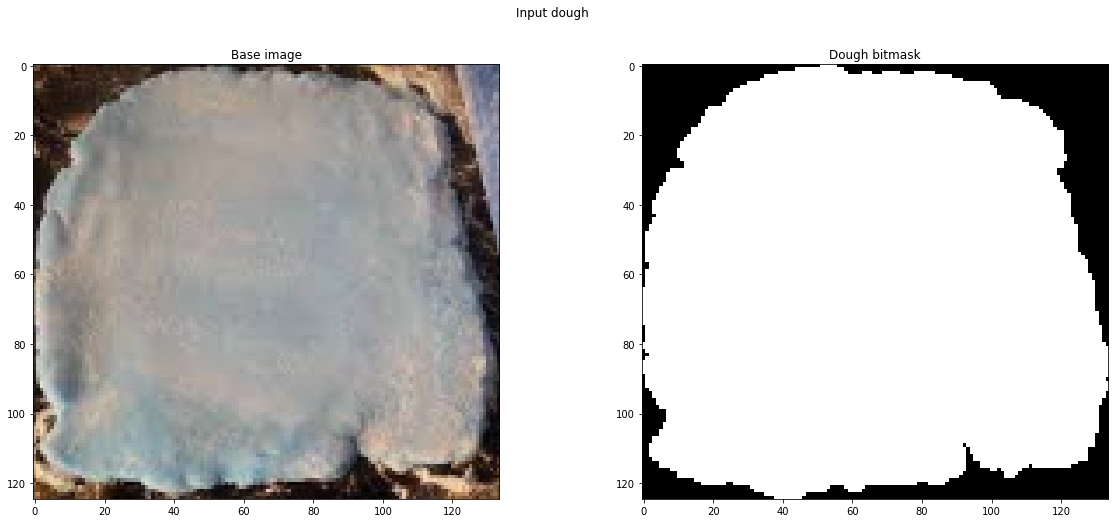

In [5]:
base_image, bitmask = utils.subsample_base_image(base_image, bitmask, resize_factor=0.7, display=True)

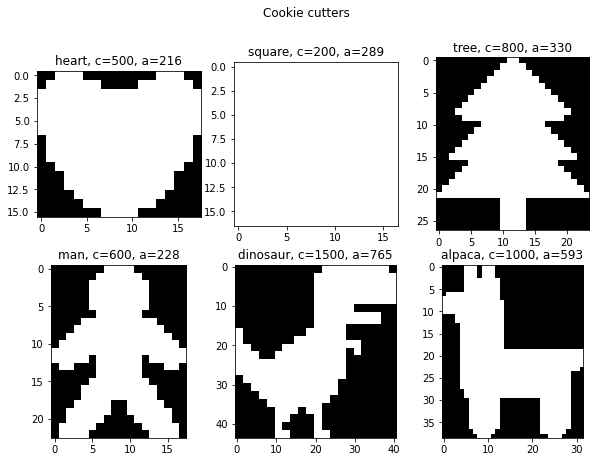

In [6]:
cutters = utils.load_cutters(cutters_path=os.path.join(images_dir, "cutters"), display=True)

## Model

In [7]:
model = cp_model.CpModel()

SETS

The problem's sets consist in:
- The set of available cutters $I$
- The set of rows of the input bitmask $N$
- The set of columns of the input bitmask $M$

In [8]:
I = list(range(len(cutters)))
N = list(range(bitmask.shape[0]))
M = list(range(bitmask.shape[1]))

print(f"I = {I}")
print(f"N = {N}")
print(f"M = {M}")

I = [0, 1, 2, 3, 4, 5]
N = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124]
M = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 11

PARAMETERS

The model's parameters consist in:
- The maximum number of rows and columns of the initial bitmask ($max\_N$ and $max\_M$)
- The initial bitmask ($binary\_mask$)
- The vectors for values ($\underline{c}$)
- The binary masks previously loaded 

In [9]:
max_N = max(N)
max_M = max(M)

binary_mask = np.where(bitmask, 1, 0)
c = [cutter['value'] for cutter in cutters]
a = [cutter['area'] for cutter in cutters]
B = np.count_nonzero(bitmask)

print(f"max_N = {max_N}")
print(f"max_M = {max_M}")
print(f"binary_mask shape: {binary_mask.shape}")
print(f"c = {c}")
print(f"a = {a}")
print("Cutters:")
for cutter in cutters:
	print(f"\t'{cutter['name']}' shape: {cutter['mask'].shape}")
print(f"B = {B}")

max_N = 124
max_M = 133
binary_mask shape: (125, 134)
c = [500, 200, 800, 600, 1500, 1000]
a = [216, 289, 330, 228, 765, 593]
Cutters:
	'heart' shape: (16, 18)
	'square' shape: (17, 17)
	'tree' shape: (27, 24)
	'man' shape: (23, 18)
	'dinosaur' shape: (44, 41)
	'alpaca' shape: (39, 32)
B = 13929


VARIABLES

The model variables are:
- $y$, binary variable over $I$, $N$ and $M$ corresponding to the top left corner of masks. $y_{n, m, i}$ is equal to 1 if mask $i$ has its top left corner in the $(n, m)$ coordinates of the input bitmask
- $z$, integer variable over $I$, $N$ and $M$ corresponding to the number of cutter masks $i \in I$ that cover the pixel $(n, m)$

In [10]:
y = {}
for n in N:
	for m in M:
		for i in I:
			y[n, m, i] = model.NewBoolVar(f'y[{n}, {m}, {i}]')

In [11]:
z = {}
for n in N:
	for m in M:
		for i in I:
			z[n, m, i] = model.NewIntVar(0, B, f'z[{n}, {m}, {i}]')

OBJECTIVE FUNCTION

The objective consists in maximizing the sum of the values of chosen biscuits

In [12]:
model.Maximize(sum([sum([y[n, m, i] for n in N for m in M]) * c[i] for i in I]))

CONSTRAINTS

The first set of constraints enforce that no $y$ that would produce an incomplete biscuit can be activated (this cell enforces both constraints using sets $IN_i$ and $OUT_i$ in the original model).

In [13]:
for i in I:
	cutter_mask = cutters[i]['mask']
	for n in N:
		for m in M:
			if not utils.can_host(bitmask, cutter_mask, n, m):
				model.Add(y[n, m, i] == 0)

The next set of constraints links $z$ and $y$ variables. The cell prints the progress as these take some time.

In [14]:
for i in I:
	cutter_mask = cutters[i]['mask']
	print(f"{cutters[i]['name']} - shape {cutter_mask.shape}")
	for n in N:
		print(f"row {n}/{max_N}        ", end='\r')
		for m in M:	
			model.Add(z[n, m, i] == sum([y[n - l, m - o, i] * cutter_mask[l, o] 
				for l in range(cutter_mask.shape[0])
				for o in range(cutter_mask.shape[1]) 
				if n - l >= 0 and m - o >= 0]))
	print()

heart - shape (16, 18)
row 124/124        
square - shape (17, 17)
row 124/124        
tree - shape (27, 24)
row 124/124        
man - shape (23, 18)
row 124/124        
dinosaur - shape (44, 41)
row 124/124        
alpaca - shape (39, 32)
row 124/124        


Next, the set of non-overlapping constraints is defined. 

In [15]:
for n in N:
	for m in M:
		model.Add(sum([z[n, m, i] for i in I]) <= 1)

Finally, the constraints for cutter frequency are added.

In [16]:
for i in I:
	for j in I:
		model.Add(sum([y[n, m, i] for n in N for m in M]) <= 3 * sum([y[n, m, j] for n in N for m in M]))

## Model solution

In [17]:
cutter_masks = {i: cutter["mask"] for i, cutter in enumerate(cutters)}

class SolutionManager(cp_model.CpSolverSolutionCallback):
    """
    Callback tracking intermediate solutions
    """

    def __init__(self, y_var):
        cp_model.CpSolverSolutionCallback.__init__(self)
        self.__y_var = y_var
        self.__solutions = []
        self.__num_solution = 0

    def on_solution_callback(self):
        self.__num_solution += 1
        current_time = round(self.WallTime(), 4)

        biscuit_counts = {i: sum([self.Value(self.__y_var[n, m, i]) for n in N for m in M]) for i in I}
        current_value = sum([sum([self.Value(self.__y_var[n, m, i]) for n in N for m in M]) * c[i] for i in I])
        biscuit_coords = {i: [(n, m) for n in N for m in M if self.Value(y[n, m, i]) == 1] for i in I}
        used_dough = sum([sum(self.Value(y[n, m, i]) for n in N for m in M) * a[i] for i in I])

        self.__solutions.append({
            "time": current_time,
            "value": current_value,
            "used_dough": used_dough,
            "counts": biscuit_counts,
            "solution": biscuit_coords
        })

        print(f'{current_time}s - New solution found: {biscuit_counts}, '
              f'value={current_value} solution={biscuit_coords}')
        
        utils.show_cut_dough(base_image, cutter_masks, biscuit_coords, 
            title=f"Solution {self.__num_solution} - value = {current_value}")

    def all_solutions(self):
        return self.__solutions

    def best_solution(self):
        return self.__solutions[-1]

196.5725s - New solution found: {0: 6, 1: 2, 2: 2, 3: 4, 4: 4, 5: 2}, value=15400 solution={0: [(90, 74), (92, 53), (92, 113), (101, 98), (104, 74), (106, 53)], 1: [(44, 16), (75, 56)], 2: [(3, 67), (65, 109)], 3: [(3, 28), (21, 9), (24, 103), (93, 37)], 4: [(9, 27), (11, 72), (48, 83), (66, 15)], 5: [(36, 51), (47, 2)]}


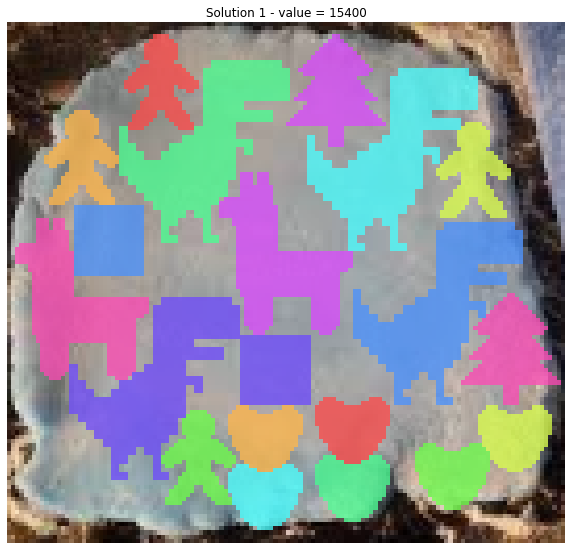

786.542s - New solution found: {0: 6, 1: 3, 2: 3, 3: 5, 4: 3, 5: 2}, value=15500 solution={0: [(90, 74), (92, 53), (92, 113), (101, 98), (104, 74), (106, 53)], 1: [(29, 81), (44, 16), (75, 56)], 2: [(3, 67), (48, 46), (65, 109)], 3: [(3, 28), (5, 89), (21, 9), (24, 103), (93, 37)], 4: [(9, 27), (49, 82), (72, 11)], 5: [(27, 65), (47, 2)]}


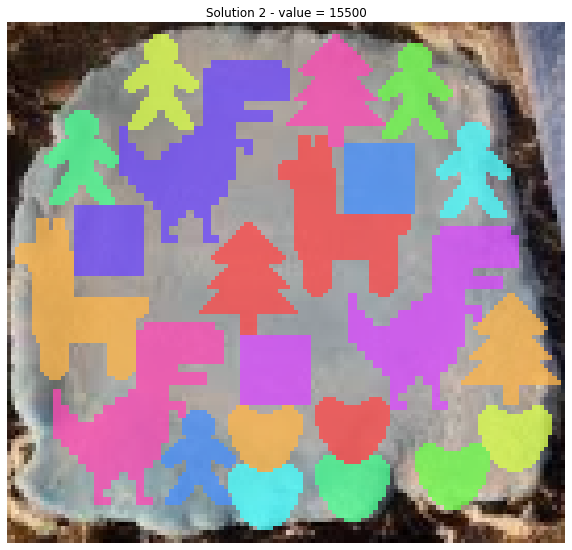

800.8093s - New solution found: {0: 6, 1: 3, 2: 5, 3: 6, 4: 2, 5: 2}, value=16200 solution={0: [(90, 74), (92, 53), (92, 113), (101, 98), (104, 74), (106, 53)], 1: [(29, 81), (44, 16), (75, 56)], 2: [(3, 67), (27, 100), (48, 46), (64, 73), (65, 109)], 3: [(3, 28), (5, 89), (21, 9), (56, 95), (78, 93), (93, 37)], 4: [(9, 27), (72, 11)], 5: [(27, 65), (47, 2)]}


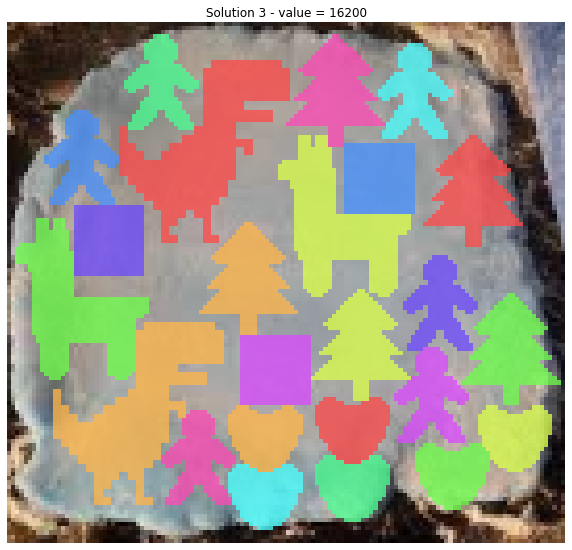

836.8783s - New solution found: {0: 6, 1: 2, 2: 6, 3: 6, 4: 2, 5: 2}, value=16800 solution={0: [(47, 107), (90, 74), (92, 53), (92, 113), (104, 74), (106, 53)], 1: [(29, 81), (55, 35)], 2: [(3, 67), (26, 6), (61, 109), (64, 73), (67, 50), (82, 91)], 3: [(3, 28), (5, 89), (21, 102), (37, 51), (56, 95), (93, 37)], 4: [(9, 27), (72, 11)], 5: [(27, 65), (49, 2)]}


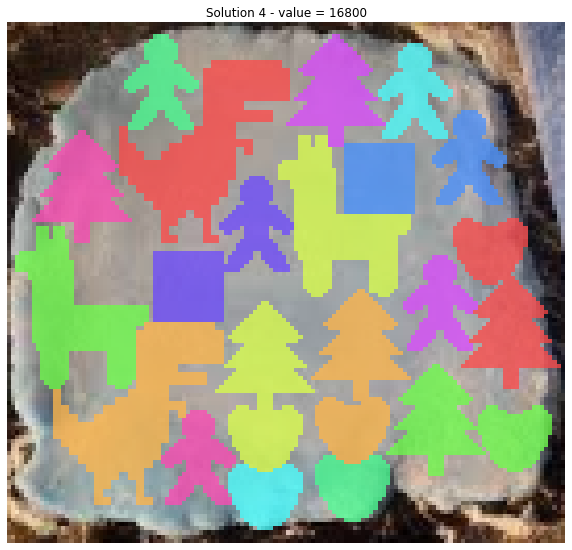

1465.3802s - New solution found: {0: 6, 1: 3, 2: 6, 3: 6, 4: 2, 5: 2}, value=17000 solution={0: [(52, 103), (89, 114), (90, 74), (92, 53), (104, 74), (106, 53)], 1: [(32, 88), (51, 18), (55, 35)], 2: [(3, 67), (24, 6), (62, 109), (64, 71), (82, 90), (98, 32)], 3: [(3, 28), (7, 90), (27, 105), (46, 53), (61, 92), (67, 54)], 4: [(11, 28), (72, 11)], 5: [(30, 67), (49, 2)]}


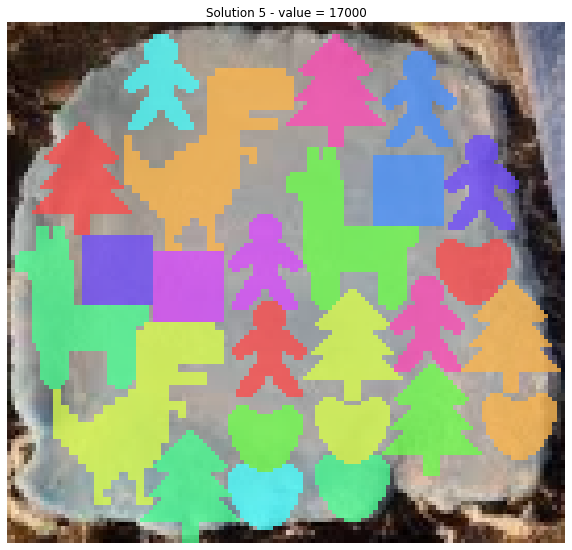

6443.8044s - New solution found: {0: 6, 1: 2, 2: 6, 3: 5, 4: 2, 5: 3}, value=17200 solution={0: [(10, 92), (90, 52), (90, 74), (95, 113), (104, 74), (106, 53)], 1: [(51, 18), (55, 37)], 2: [(5, 28), (24, 7), (65, 71), (65, 110), (84, 91), (98, 32)], 3: [(15, 104), (42, 104), (47, 54), (63, 93), (67, 54)], 4: [(11, 32), (72, 11)], 5: [(10, 76), (30, 67), (49, 2)]}


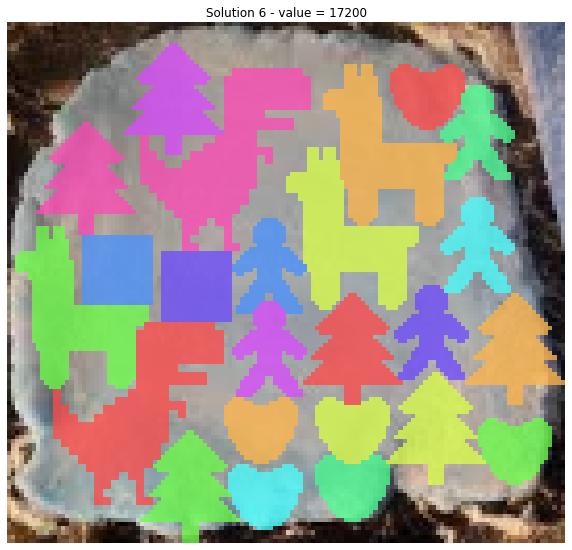

6549.2427s - New solution found: {0: 6, 1: 3, 2: 6, 3: 5, 4: 2, 5: 3}, value=17400 solution={0: [(2, 37), (10, 92), (55, 104), (90, 74), (95, 113), (104, 74)], 1: [(38, 106), (51, 18), (55, 37)], 2: [(24, 7), (65, 71), (65, 110), (84, 91), (94, 52), (98, 32)], 3: [(7, 24), (15, 104), (47, 54), (63, 93), (67, 54)], 4: [(11, 32), (72, 11)], 5: [(10, 76), (30, 67), (49, 2)]}


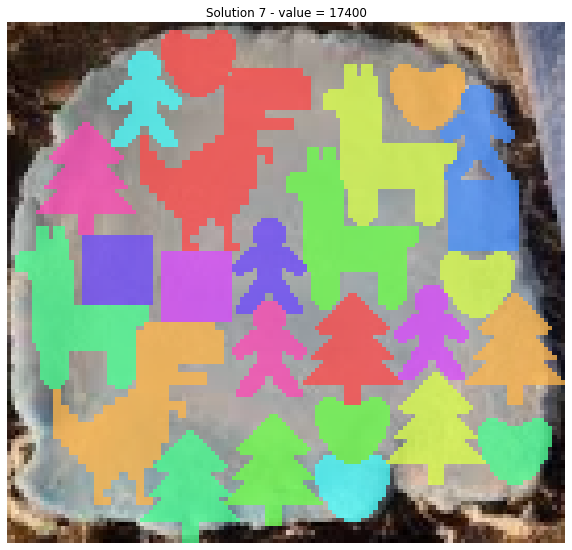

6686.3534s - New solution found: {0: 5, 1: 3, 2: 6, 3: 6, 4: 2, 5: 3}, value=17500 solution={0: [(2, 37), (10, 92), (55, 104), (90, 74), (104, 74)], 1: [(38, 106), (51, 18), (55, 37)], 2: [(24, 7), (65, 71), (65, 110), (68, 49), (94, 52), (98, 32)], 3: [(7, 24), (15, 104), (47, 54), (63, 93), (87, 92), (90, 108)], 4: [(11, 32), (72, 11)], 5: [(10, 76), (30, 67), (49, 2)]}


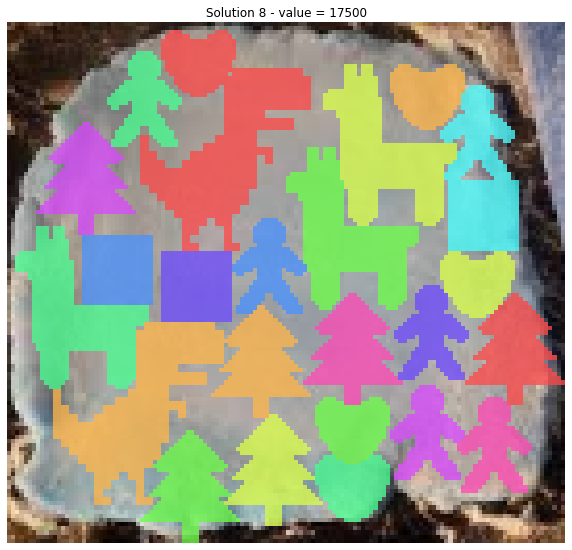

6814.1954s - New solution found: {0: 6, 1: 2, 2: 6, 3: 6, 4: 2, 5: 3}, value=17800 solution={0: [(2, 37), (10, 92), (38, 105), (55, 104), (90, 74), (104, 74)], 1: [(51, 18), (55, 37)], 2: [(24, 7), (65, 71), (65, 110), (68, 49), (94, 52), (98, 32)], 3: [(7, 24), (15, 104), (47, 54), (63, 93), (87, 92), (90, 108)], 4: [(11, 32), (72, 11)], 5: [(10, 76), (30, 67), (49, 2)]}


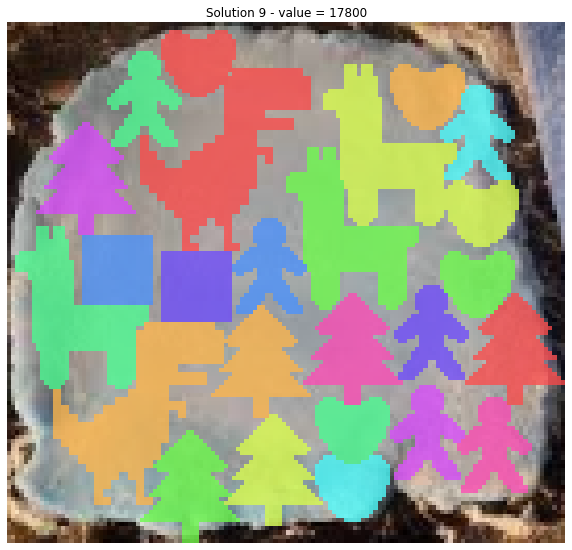

In [18]:
solver = cp_model.CpSolver()
solver.parameters.max_time_in_seconds = 40000.0

solution_callback = SolutionManager(y)
status = solver.Solve(model, solution_callback)

In [19]:
if status == cp_model.OPTIMAL or status == cp_model.FEASIBLE:
	print(f'Objective value: {solver.ObjectiveValue()}\n')
	all_solutions = solution_callback.all_solutions()
	solution = solution_callback.best_solution()
else:
	print('No solution found.')

print('\nStatistics')
print(f'  status   : {solver.StatusName(status)}')
print(f'  conflicts: {solver.NumConflicts()}')
print(f'  branches : {solver.NumBranches()}')
print(f'  wall time: {solver.WallTime()} s')

Objective value: 17800.0


Statistics
  status   : FEASIBLE
  conflicts: 13850
  branches : 192318
  wall time: 40004.609553181006 s


## Solution visualization

In [20]:
print("Solution:")
pprint(solution)

Solution:
{'counts': {0: 6, 1: 2, 2: 6, 3: 6, 4: 2, 5: 3},
 'solution': {0: [(2, 37), (10, 92), (38, 105), (55, 104), (90, 74), (104, 74)],
              1: [(51, 18), (55, 37)],
              2: [(24, 7), (65, 71), (65, 110), (68, 49), (94, 52), (98, 32)],
              3: [(7, 24), (15, 104), (47, 54), (63, 93), (87, 92), (90, 108)],
              4: [(11, 32), (72, 11)],
              5: [(10, 76), (30, 67), (49, 2)]},
 'time': 6814.1954,
 'used_dough': 8531,
 'value': 17800}


In [21]:
print(f'Cookie dough used = {round(sum([len(solution["solution"][i]) * a[i] for i in I]) / B * 100, 2)}%')

Cookie dough used = 61.25%


In [22]:
print(np.max(cutter_masks[0]))

1


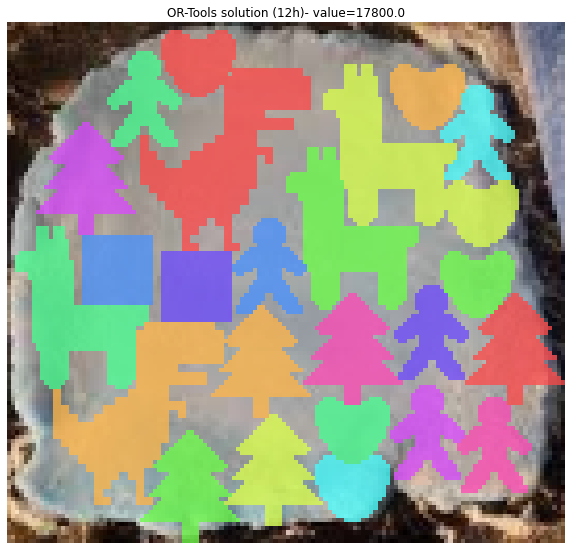

In [23]:
cutter_masks = {i: cutter["mask"] for i, cutter in enumerate(cutters)}
utils.show_cut_dough(base_image, cutter_masks, solution["solution"], title=f"OR-Tools solution (12h)- value={solver.ObjectiveValue()}")

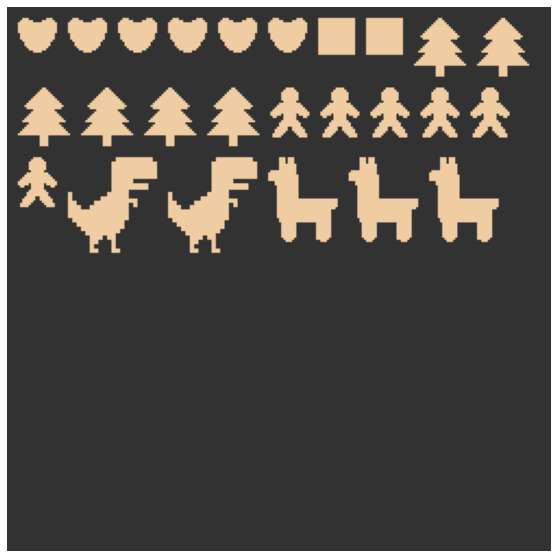

In [24]:
utils.show_pan(cutter_masks, {i: len(l) for i, l in solution["solution"].items()})

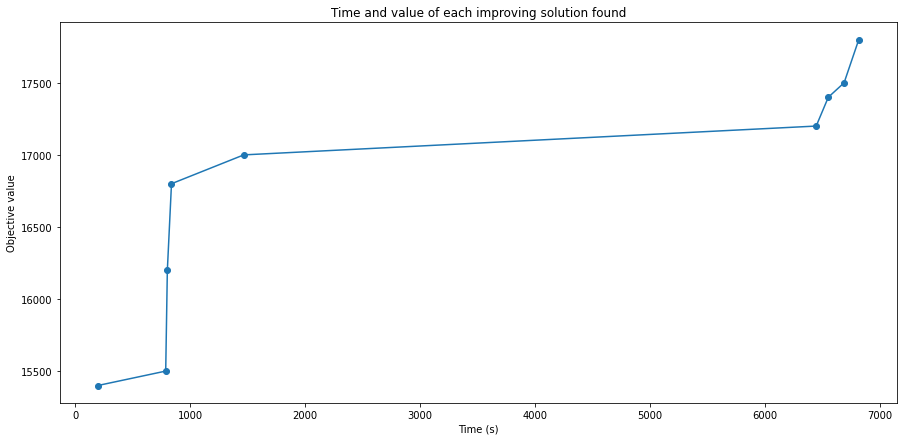

In [25]:
utils.show_solution_time(all_solutions)